**Question 3**

In [1]:
import numpy as np

def attention(Q, K, V):
    d_k = Q.shape[-1]

    z = np.matmul(Q, K.T) / np.sqrt(d_k)

    z = z - np.max(z, axis=-1, keepdims=True)
    attention_weights = np.exp(z)
    attention_weights /= np.sum(attention_weights, axis=-1, keepdims=True)

    output = np.matmul(attention_weights, V)

    return output, attention_weights


**Question 4**

In [2]:
import numpy as np

def masked_attention(Q, K, V):
    d_k = Q.shape[-1]

    z = np.matmul(Q, K.T) / np.sqrt(d_k)

    n = z.shape[0]
    mask = np.triu(np.ones((n, n)), k=1)
    z = z - 1e9 * mask

    z = z - np.max(z, axis=-1, keepdims=True)
    attention_weights = np.exp(z)
    attention_weights /= np.sum(attention_weights, axis=-1, keepdims=True)

    output = np.matmul(attention_weights, V)

    return output, attention_weights


In [3]:
np.set_printoptions(precision=3, suppress=True)

Q = np.array([[1,0],
              [0,1],
              [1,1]])

K = Q.copy()
V = np.array([[1,0],
              [0,2],
              [3,3]])

out, weights = attention(Q, K, V)

print("Attention Weights:")
print(weights)


Attention Weights:
[[0.401 0.198 0.401]
 [0.198 0.401 0.401]
 [0.248 0.248 0.503]]


In [4]:
np.set_printoptions(precision=3, suppress=True)

Q = np.array([[1,0],
              [0,1],
              [1,1]])

K = Q.copy()
V = np.array([[1,0],
              [0,2],
              [3,3]])

out, weights = masked_attention(Q, K, V)

print("Attention Weights:")
print(weights)


Attention Weights:
[[1.    0.    0.   ]
 [0.33  0.67  0.   ]
 [0.248 0.248 0.503]]


**Question 5**

In [5]:
!pip install transformers torch matplotlib seaborn

In [6]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [7]:
sentence = "I am from China and I speak Chinese"

inputs = tokenizer(sentence, return_tensors="pt")
outputs = model(**inputs)
attentions = outputs.attentions
layer = 0
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

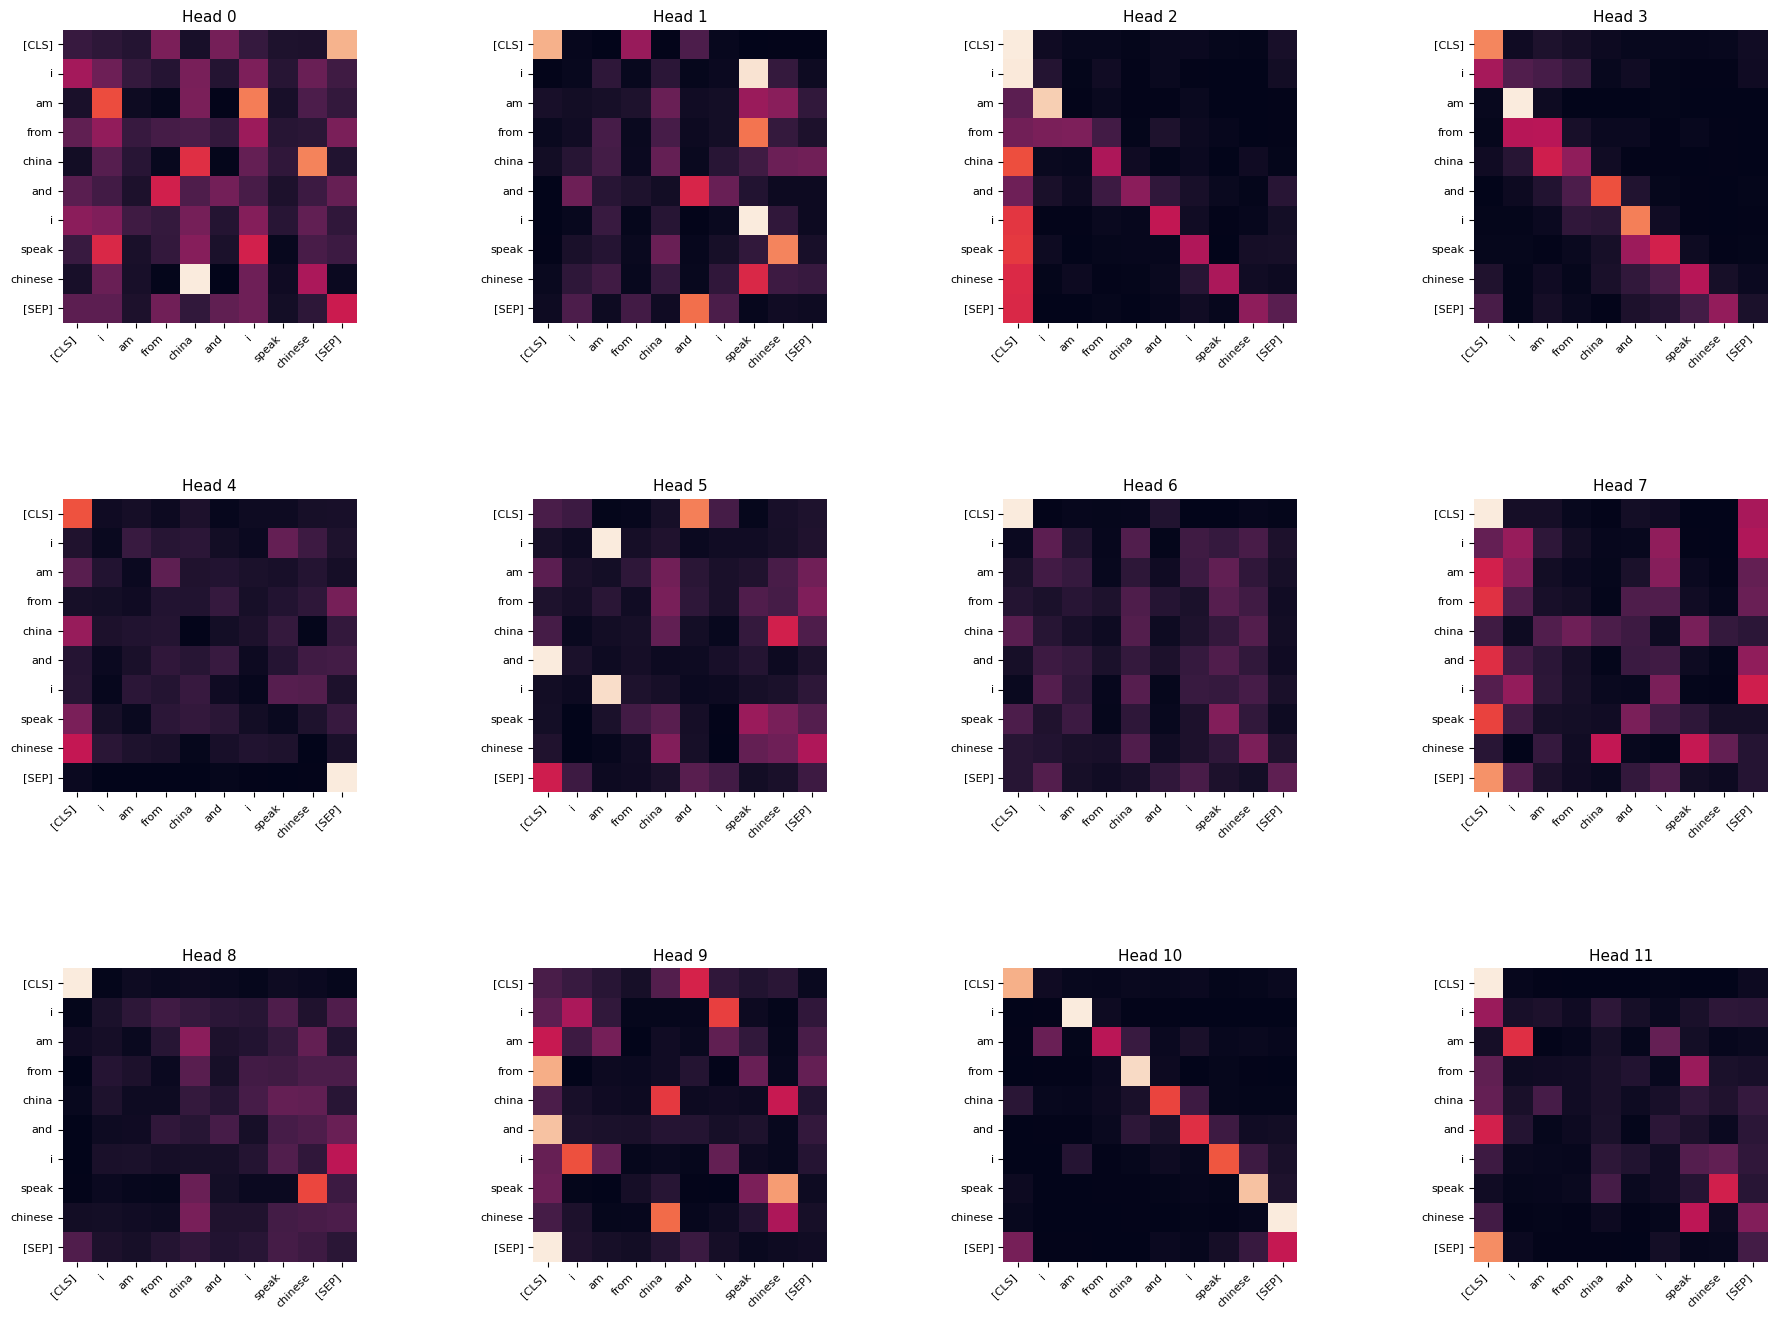

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 4, figsize=(22, 16))

for h, ax in enumerate(axes.flat):
    sns.heatmap(
        attentions[layer][0, h].detach().numpy(),
        xticklabels=tokens,
        yticklabels=tokens,
        cbar=False,
        ax=ax
    )
    ax.set_title(f"Head {h}", fontsize=11)
    ax.set_xticklabels(tokens, rotation=45, ha="right", fontsize=8)
    ax.set_yticklabels(tokens, fontsize=8)

plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()